In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#import paper_tools
import census
import numpy as np
#load the census data
#sheffield
#bbox = np.array([430,440,381,391])
bbox = np.array([433,437,382,386])
pathtodata = '/home/ubuntu/hetMOGPintegral/hetGPIntegralexperiments/'
shapefilename=pathtodata+'oaboundaries/Output_Area_December_2011_Generalised_Clipped_Boundaries_in_England_and_Wales.shp'
oafilename=pathtodata+'oa_to_lsoa/OA11_LSOA11_MSOA11_LAD11_EW_LUv2.csv'
randomoafilename = pathtodata+'oa_to_lsoa/RANDOM_SOAS_2.csv' #this file contains MSOA that have been randomly assigned
oadescfilename=pathtodata+'oadata/KS102ew_2011_oa/KS102EW_2011STATH_NAT_OA_REL_1.4.4/KS102EWDESC0.CSV'
oadatafilename=pathtodata+'oadata/KS102ew_2011_oa/KS102EWDATA.CSV'

#X,Y,testX,testY = census.get_census_data(box=bbox*1000,verbose=True)
X1,Y1,oaX1,oaY1 = census.get_census_data(shapefilename=shapefilename,
                                         oafilename=oafilename,
                                         oadescfilename=oadescfilename,
                                         oadatafilename=oadatafilename,
                                         box=bbox*1000,verbose=True,refresh=False)
X1 = np.c_[X1,np.zeros([len(X1),1])]
oaX1 = np.c_[oaX1,np.zeros([len(oaX1),1])]

Trying cache...
Cache loaded.
Loaded from cache, 18 training polygons and 280 testing polygons


In [3]:
from shapeintegrals_fast_modified_for_hetGP import ShapeIntegral
import GPy
kern = GPy.kern.RBF(2, lengthscale=10.0, variance = 1.0, ARD=False)
oldshapek = ShapeIntegral(X1.shape[1],input_space_dim=2,Nperunit=5,kernel=kern)
m = GPy.models.GPRegression(X1,Y1,oldshapek)
m.Gaussian_noise=10.0
#predY,_=m.predict(testX)#[0:3,:]

 /home/ubuntu/hetMOGPintegral/hetGPIntegralexperiments/shapeintegrals_fast_modified_for_hetGP.py:93: RuntimeWarning:divide by zero encountered in true_divide


In [4]:
def oldplotsimplexes(X,c='k',lw=1):
    for x in X:
        edges = []
        if x[-1]==0:
            for tri in x[0:-1].reshape(int(len(x)/6),6):
                plt.plot(tri[[0,2,4,0]],tri[[1,3,5,1]],c=c,lw=lw)
        else:
            print("PLOTTING A POINT! AHH")
            plt.plot(x[0],x[1],'x'+c,mew=5,markersize=20)
            
            
def plotsimplexes(X,c='k',lw=1):
    for x in X:
        edges = []
        if x[-1]==0:
            for tri in x[0:-1].reshape(int(len(x)/6),6):
                #edges.append(tri[[0,1,2,3]])
                #edges.append(tri[[2,3,4,5]])
                #edges.append(tri[[4,5,0,1]])
                #plt.plot(tri[[0,2,4,0]],tri[[1,3,5,1]],c=c,lw=lw)
                xs = (tri[[0,2,4,0]]*10+np.mean(tri[[0,2,4,0]]))/11
                ys = (tri[[1,3,5,1]]*10+np.mean(tri[[1,3,5,1]]))/11
                plt.plot(xs,ys,c=c,lw=lw)
                #plt.plot(tri[[0,2,4,0]],tri[[1,3,5,1]],c=c,lw=lw)
                #plt.fill(tri[[0,2,4,0]],tri[[1,3,5,1]],c=c)
        else:
            plt.plot(x[0],x[1],'x'+c,mew=5,markersize=20)
            
            

            
#def plotsimplexes(X,c='k',lw=1):
#    for x in X:
#        if x[-1]==0:
#            for tri in x[0:-1].reshape(int(len(x)/6),6):
#                plt.plot(tri[[0,2,4,0]],tri[[1,3,5,1]],c=c,lw=lw)
#        else:
#            print("PLOTTING A POINT! AHH")
#            plt.plot(x[0],x[1],'x'+c,mew=5,markersize=20)
            
            


In [5]:
Xa,Xb = np.meshgrid(np.linspace(432,438,25),np.linspace(381,387,25))
testX = np.c_[Xa.flatten(),Xb.flatten()]
testX = np.c_[testX,np.ones([testX.shape[0],X1.shape[1]-2])]
#m.optimize()
#preds,_ = m.predict_noiseless(testX)

In [6]:
bbox

array([433, 437, 382, 386])

In [7]:
!ls

'Air Pollution.ipynb'
'Census Demo-Binary.ipynb'
'Census Demo.ipynb'
 Datasets.ipynb
'Grad Checking.ipynb'
 README.md
 TNO4036.csv
 Untitled.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 __pycache__
 air_pollution_demo_data.p
 census.py
 census.zip
 census_430000_440000_381000_391000.p
 census_433000_437000_382000_386000.p
 census_433000_437000_384000_388000.p
 census_demo_data.p
 channel295702.p
 channel718028.p
 codepo_gb.zip
 demo_mnist_Integral_kernel-Mike-1d.ipynb
 demo_mnist_ShapeIntegral_kernel-Mike-quick_detour_to_test_it.ipynb
 demo_mnist_ShapeIntegral_kernel.ipynb
 oldHP
 old_pp.csv
 pp-complete.csv
 sampled_pp.csv
 shapeintegrals_fast_modified_for_hetGP.py
 sheffield_houseprices.csv


In [8]:
from dp4gp import datasets
from dp4gp import dp4gp
from dp4gp import histogram
from dp4gp.utils import dp_normalise, dp_unnormalise
import numpy as np
import pandas as pd
import GPy
import matplotlib.pyplot as plt
%matplotlib inline

#datasets.prepare_preloaded_prices('sheffield_houseprices.csv', col_list=[], since=2000, boundingbox=bbox[[0,2,1,3]]*1000, N=5000)
dataset = pd.read_csv('sheffield_houseprices.csv') #sheffield
#inputs = np.vstack([dataset['easting'].values,dataset['northing'].values]).T
#ys = dataset['price'].values

In [9]:
dataset.loc[dataset['type']=='D','type']='b' #big
dataset.loc[dataset['type']=='S','type']='b' #big
dataset.loc[dataset['type']=='T','type']='s' #small
dataset.loc[dataset['type']=='F','type']='s' #small
#dataset[dataset['type'] in set(['s','b'])]
dataset = dataset[dataset.type!='O']

In [10]:
X2 = np.c_[dataset['easting'].values/1000,dataset['northing'].values/1000,np.full([len(dataset),X1.shape[1]-3],np.NaN),np.ones(len(dataset))]
tempY2 = dataset['type'].values
#plt.plot(east[dataset['type']==housetype].values/1000,north[dataset['type']==housetype].values/1000,pattern,markersize=2)

In [11]:
Y2 = np.zeros(len(tempY2))[:,None]
for i,t in enumerate(list(set(tempY2))):
    Y2[tempY2==t,0]=1.0*i

In [12]:
X = [X1,X2]
Y = [Y1,Y2]

# Saving the data

In [13]:
oavolumes = []
for i in range(len(oaX1)):
    oavolumes.append(m.kern.placepoints(oaX1[i,:-1])[1])
    
volumes = []
for i in range(len(X1)):
    volumes.append(m.kern.placepoints(X1[i,:-1])[1])    
    
census_demo_data = {'X':X,'Y':Y,'oaX':oaX1,'oaY':oaY1,'volumes':volumes,'oavolumes':oavolumes}
import pickle
pickle.dump(census_demo_data,open('census_demo_data.p','wb'))

 /home/ubuntu/hetMOGPintegral/hetGPIntegralexperiments/shapeintegrals_fast_modified_for_hetGP.py:93: RuntimeWarning:divide by zero encountered in true_divide


# Analysis

In [14]:
import numpy as np
from scipy.stats import multinomial
from scipy.linalg.blas import dtrmm

import GPy
from GPy.util import choleskies
from GPy.core.parameterization.param import Param
from GPy.kern import Coregionalize
from GPy.likelihoods import Likelihood
from GPy.util import linalg

from hetmogp.util import draw_mini_slices
from hetmogp.het_likelihood import HetLikelihood
#from hetmogp.model import HetMOGP
from hetmogp.svmogp import SVMOGP
#from hetmogp import multi_output
from hetmogp import util
from hetmogp.util import vem_algorithm as VEM

import matplotlib.pyplot as plt
from matplotlib.pyplot import gca
from matplotlib import rc, font_manager
from matplotlib import rcParams
#from matplotlib2tikz import save as tikz_save

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import GPy
import matplotlib.pyplot as plt

In [15]:
latentkern = GPy.kern.RBF(2,lengthscale=10.0,variance=1.0)
k = ShapeIntegral(X1.shape[1],2,kernel=latentkern,Nperunit=3)
m = GPy.models.GPRegression(X1,Y1,k)
m.Gaussian_noise.fix(0.001)

array([0])

In [16]:
m

GP_regression.,value,constraints,priors
shapeintegral.variance,1.0,+ve,
shapeintegral.lengthscale,1.0,+ve,
Gaussian_noise.variance,0.001,+ve fixed,


In [17]:
Xa,Xb = np.meshgrid(np.linspace(bbox[0],bbox[1],35),np.linspace(bbox[2],bbox[3],35))
testX = np.c_[Xa.flatten(),Xb.flatten()]
testX = np.c_[testX,np.ones([len(testX),X1.shape[1]-2])]
#preds,_ = m.predict_noiseless(testX)

In [18]:
#property Type      D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other
dataset.groupby('type').count()
#detached/semidetached = big property
#terraced/flats = small property

,Unnamed: 0,postcode,easting,northing,Unnamed: 0.1,price,date,seconds,years
type,,,,,,,,,
b,1921,1921,1921,1921,1921,1921,1921,1921,1921
s,3029,3029,3029,3029,3029,3029,3029,3029,3029


In [19]:
np.nanmean(oaX1[i,1::2])

382.0545730076723

In [20]:
plt.figure(figsize=[20,20])
#plt.contourf(Xa, Xb, preds.reshape(Xa.shape[0],Xa.shape[1]))
#plt.colorbar()
for i in range(0,len(oaX1)):
    v = m.kern.placepoints(oaX1[i,:-1])[1]
    popden = (oaY1[i,0]/v)/10000
    if popden>0.8:
        popden=0.8
    c = np.array([[popden,popden,popden,1]])
    #plt.scatter(oaX1[i,0:-1:2],oaX1[i,1::2],100,c=c[None,:])
  ##  plotsimplexes(oaX1[i:(i+1),:],c=c[0])

<Figure size 1440x1440 with 0 Axes>

(382, 386)

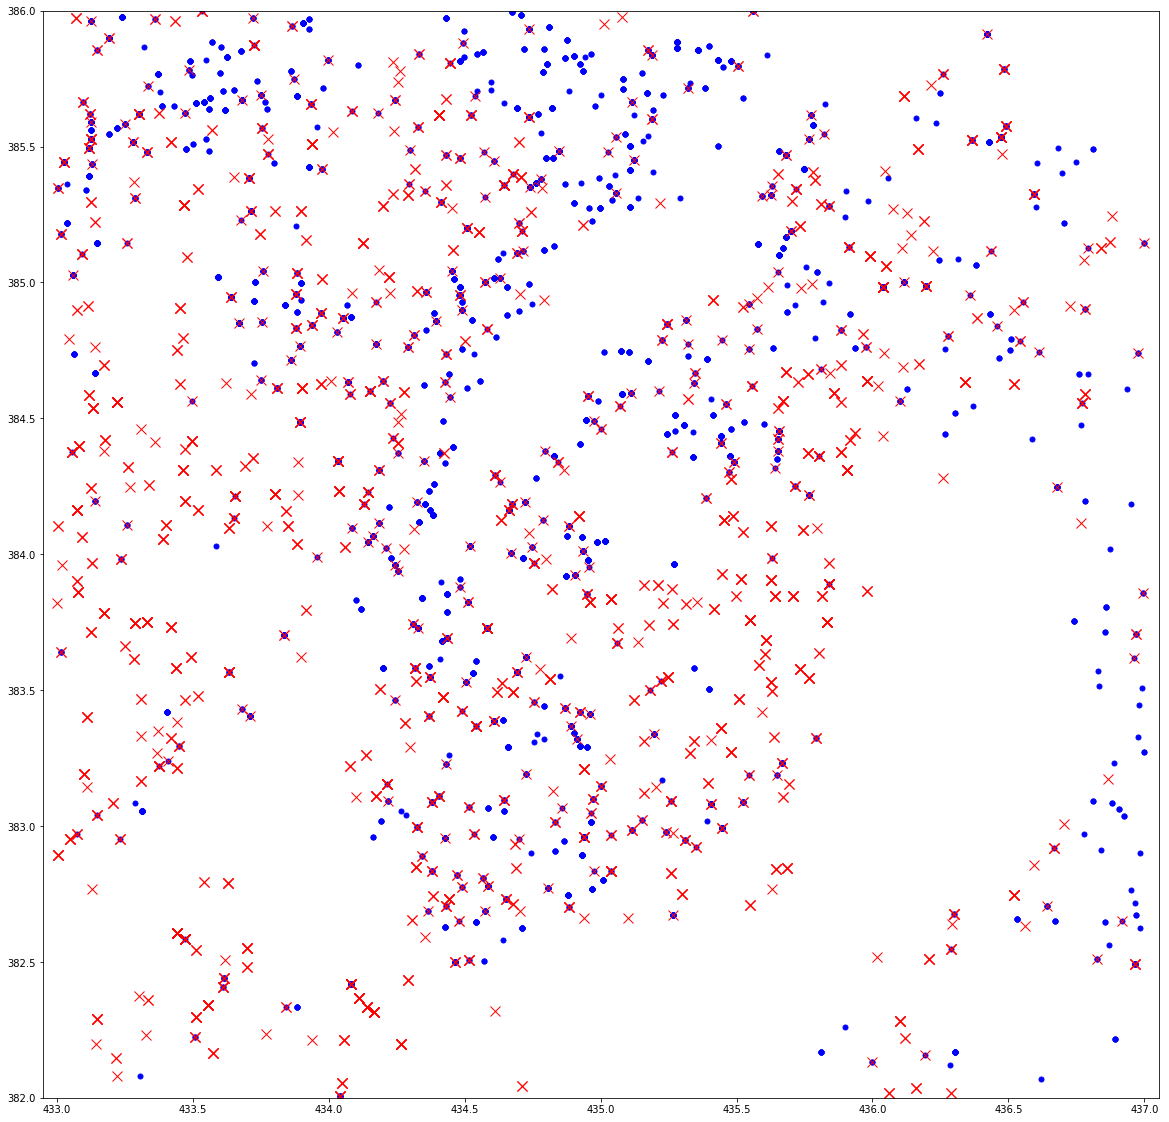

In [21]:
plt.figure(figsize=[20,20])
#plt.contourf(Xa, Xb, preds.reshape(Xa.shape[0],Xa.shape[1]))
#plt.colorbar()
for i in range(0,len(oaX1),10):
    v = m.kern.placepoints(oaX1[i,:-1])[1]
    popden = (oaY1[i,0]/v)/10000
    if popden>0.8:
        popden=0.8
    c = np.array([[popden,popden,popden,1]])
    #plt.scatter(oaX1[i,0:-1:2],oaX1[i,1::2],100,c=c[None,:])
    #plotsimplexes(oaX1[i:(i+1),:],c=c[0])
    #plt.scatter(np.nanmean(oaX1[i,:-1:2]),np.nanmean(oaX1[i,1::2]),s=5000,c=c)
    #print(np.nanmean(oaX1[i,:-1:2]),np.nanmean(oaX1[i,1::2]))
#plotsimplexes(X[0:5,:])
#c = dataset['price'].values/(np.mean(dataset['price'].values*2))
#c[c>1]=1
#c = np.c_[c*0,c*0,c]
#plt.scatter(dataset['easting'].values/1000,dataset['northing'].values/1000,3,c)
east=dataset['easting']
north=dataset['northing']
housetypes = list(set(dataset['type']))
for i, pattern in enumerate(['b.','rx']):
    
    plt.plot(east[dataset['type']==housetypes[i]].values/1000,north[dataset['type']==housetypes[i]].values/1000,pattern,markersize=10)
plt.axis('equal');
plt.xlim(bbox[[0,1]])
plt.ylim(bbox[[2,3]])
#plt.savefig('demo.png')

# SVI etc

### Temporary simplified data

In [22]:
#X[0] = 1.0*np.array([[435,383,436,383,435,384,436,384,436,383,435,384,436,383,437,383,436,384,437,384,437,383,436,384,0]
#                     ,[435,384,436,384,435,385,436,385,436,384,435,385,436,384,437,384,436,385,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,0]
#                     ,[437,384,438,384,437,385,438,385,437,384,438,385,437,384,438,384,438,385,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,0]
#                     ,[440,384,441,384,440,385,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,0]
#                     ,[438,386,439,386,439,387,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,0]])
#Y[0] = 1.0*np.array([[1135],[7229],[8525],[6000],[4000]])
##X[1] = 1.0*np.array([[435,383],[437,386],[438,386],[437,388],[435,385]])
#X[1] = np.random.rand(20,2)
#X[1][:,0] = X[1][:,0]+435
#X[1][:,1] = X[1][:,1]+383
#X[1] = np.c_[X[1],np.full([len(X[1]),X[0].shape[1]-3],np.NaN),np.ones(len(X[1]))]
##Y[1] = np.array([[3,4,4,4,3]]).T
#Y[1] = (3+np.floor(((X[1][:,0]*3) % 1)*2))[:,None]

#Xa,Xb = np.meshgrid(np.linspace(bbox[0],bbox[1],15),np.linspace(bbox[2],bbox[3],15))
#testX = np.c_[Xa.flatten(),Xb.flatten()]
#testX = np.c_[testX,np.ones([len(testX),X[0].shape[1]-2])]


In [23]:
Z = np.random.rand(20,X[0].shape[1])*4
Z[:,0]+=433 #[433,437,382,386])
Z[:,1]+=382
Z[:,2:-1]=np.NaN
Z[:,-1]=1
kern_list=[ShapeIntegral(X[0].shape[1],2,kernel=GPy.kern.RBF(2,lengthscale=1.0),Nperunit=2)]

In [24]:
X[0].shape

(18, 2929)

In [25]:
X[1].shape

(4950, 2929)

In [26]:
#X[1] = X[1][::5,:]

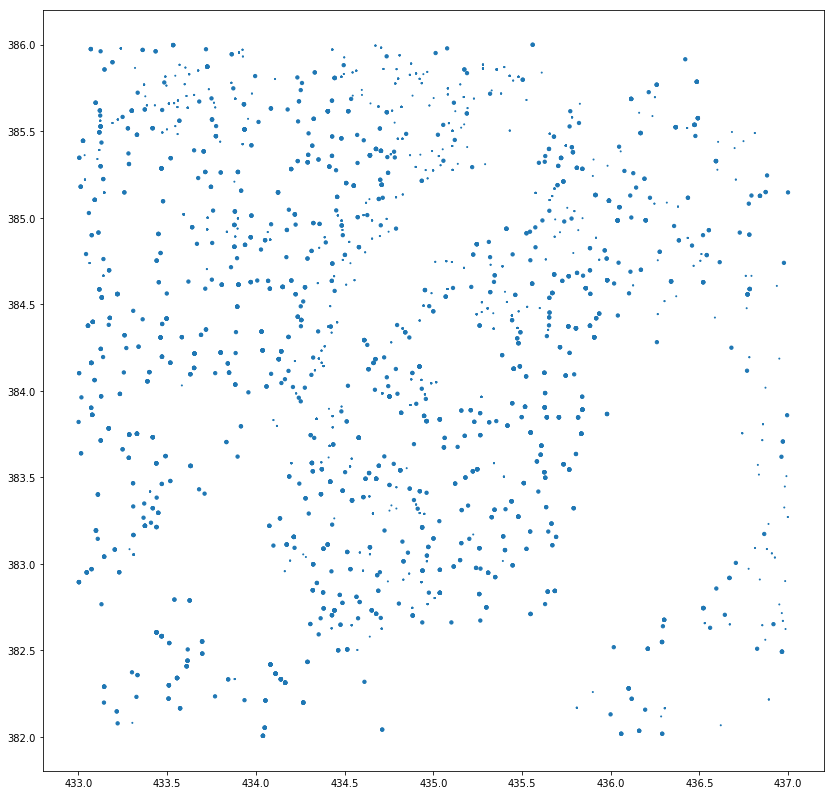

In [27]:
plt.figure(figsize=[14,14])
plt.scatter(X[1][:,0],X[1][:,1],1+Y[1][:,0]*10)

In [28]:
#X[0]=X[0][::1,:]
#Y[0]=Y[0][::1,:]
X[1]=X[1][::20,:]
Y[1]=Y[1][::20,:]

In [29]:
X[0].shape

(18, 2929)

In [30]:
X[1].shape

(248, 2929)

In [31]:
Z.shape

(20, 2929)

In [32]:
from hetmogp.likelihoods.bernoulli import Bernoulli
from hetmogp.likelihoods.gaussian import Gaussian
from hetmogp.likelihoods.categorical import Categorical
from hetmogp.likelihoods.hetgaussian import HetGaussian
from hetmogp.likelihoods.beta import Beta
from hetmogp.likelihoods.gamma import Gamma
from hetmogp.likelihoods.exponential import Exponential

In [54]:
# MODEL and INFERENCE
Q=1
#likelihoods_list = [Gaussian(sigma=0.001),Bernoulli(gp_link=GPy.likelihoods.link_functions.Probit())]#,Gaussian(sigma=1.0)]
likelihoods_list = [Gaussian(sigma=10), Categorical(5)]
likelihood = HetLikelihood(likelihoods_list)
Y_metadata = likelihood.generate_metadata()

D = likelihood.num_output_functions(Y_metadata)

W_list, _ = util.random_W_kappas(Q, D, rank=1, experiment=True)

model = SVMOGP(X=X, Y=Y, Z=Z, kern_list=kern_list, likelihood=likelihood, Y_metadata=Y_metadata,batch_size=50)

 /home/ubuntu/anaconda3/lib/python3.7/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


In [ ]:
model.Z

In [55]:
model.kern_list[0].variance = 100.0

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
X[1].shape

In [ ]:
#model=VEM(model,vem_iters=3,maxIter_perVEM=4,optZ=False,verbose=True,verbose_plot=False,non_chained=True)

def callback(i):
    print(i)
    if i['n_iter'] > 10:
        return True
    return False


#vem_model=VEM(model,vem_iters=30,maxIter_perVEM=30,optZ=False,verbose=True,verbose_plot=False,non_chained=True)
import climin
opt = climin.Adam(model.optimizer_array,model.stochastic_grad,step_rate=0.1,decay_mom1=1-0.9, decay_mom2=1-0.999)
opt.minimize_until(callback)

In [50]:
Z[:,-1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [ ]:
means,variances = model.predict(testX1)
preds = means[0]

In [ ]:
plt.figure(figsize=[20,20])
ax=plt.gca()
plt.contourf(Xa, Xb, preds.reshape(Xa.shape[0],Xa.shape[1]))
plt.colorbar()
def plotsimplexes(X,Y,c,lw=1):
    for i,(x,y) in enumerate(zip(X,Y)):
        #plt.text(x[0],x[1],"%0.1f"%y)
        if x[-1]==0:
            for tri in x[0:-1].reshape(int(len(x)/6),6):
                plt.plot(tri[[0,2,4,0]],tri[[1,3,5,1]],c,lw=lw)
        else:
            plt.plot(x[0],x[1],['xr','ob','+g','.k','bx'][int(y[0])],mew=5,markersize=10)
plotsimplexes(X[1],Y[1],'g-')
plotsimplexes(X[0],Y[0],'g-')
plt.scatter(Z[:,0],Z[:,1])

for i in range(len(X[0])):
    v = m.kern.placepoints(X[0][i,:-1])[1]
    popden = (Y[0][i,0]/v)/10000
    if popden>1:
        popden=1
    c = np.array([popden,popden,popden,1])
    plt.scatter(X[0][i,0:-1:2],X[0][i,1::2],1,c=c[None,:])
plt.xlim([bbox[0],bbox[1]])
plt.ylim([bbox[2],bbox[3]])